In [151]:
import pandas as pd
import numpy as np
import sklearn

In [152]:
df = pd.read_csv('housing.csv'); df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,MEDV,isHighValue
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,0
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,1
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,1
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,1


In [153]:
df = df.drop(['Unnamed: 0'], axis = 1); df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,MEDV,isHighValue
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,1


In [154]:
df.shape # dataframe의 형태

(526, 15)

In [155]:
df.info() # 결측치 확인이 가능하다, CRIM에 20개의 결측치가 있는것으로 보임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         506 non-null    float64
 1   ZN           526 non-null    float64
 2   INDUS        526 non-null    float64
 3   CHAS         526 non-null    int64  
 4   NOX          526 non-null    float64
 5   RM           526 non-null    float64
 6   AGE          526 non-null    float64
 7   DIS          526 non-null    float64
 8   RAD          526 non-null    int64  
 9   TAX          526 non-null    float64
 10  PIRATIO      526 non-null    float64
 11  B            526 non-null    float64
 12  LSTAT        526 non-null    float64
 13  MEDV         526 non-null    float64
 14  isHighValue  526 non-null    int64  
dtypes: float64(12), int64(3)
memory usage: 61.8 KB


In [156]:
df.describe() # 통계값을 확인할 수 있다

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,MEDV,isHighValue
count,506.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,3.613524,10.931559,11.306616,0.066540,0.555954,6.271076,68.816540,3.742880,9.416350,410.547529,18.513308,357.888099,12.721578,22.374525,0.250951
std,8.601545,22.977112,6.934739,0.249461,0.113854,0.698140,27.868375,2.083661,8.653743,169.180818,2.147684,89.829808,7.101213,9.104400,0.433973
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.453000,5.879250,45.625000,2.101425,4.000000,279.000000,17.400000,376.057500,7.150000,16.850000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.183500,77.500000,3.095750,5.000000,334.500000,19.100000,391.955000,11.490000,21.100000,0.000000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.613500,93.900000,5.112625,24.000000,666.000000,20.200000,396.397500,17.057500,24.950000,0.750000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000


In [157]:
df.isnull().sum() # 각 열의 결측치값

CRIM           20
ZN              0
INDUS           0
CHAS            0
NOX             0
RM              0
AGE             0
DIS             0
RAD             0
TAX             0
PIRATIO         0
B               0
LSTAT           0
MEDV            0
isHighValue     0
dtype: int64

In [158]:
df.shape

(526, 15)

In [159]:
df.isnull().sum()/ df.shape[0]

CRIM           0.038023
ZN             0.000000
INDUS          0.000000
CHAS           0.000000
NOX            0.000000
RM             0.000000
AGE            0.000000
DIS            0.000000
RAD            0.000000
TAX            0.000000
PIRATIO        0.000000
B              0.000000
LSTAT          0.000000
MEDV           0.000000
isHighValue    0.000000
dtype: float64

In [160]:
df_1 = df.copy()
med_val = df['CRIM'].median()
df_1['CRIM'] = df_1['CRIM'].fillna(med_val)
df_1.isnull().sum()

CRIM           0
ZN             0
INDUS          0
CHAS           0
NOX            0
RM             0
AGE            0
DIS            0
RAD            0
TAX            0
PIRATIO        0
B              0
LSTAT          0
MEDV           0
isHighValue    0
dtype: int64

In [161]:
import seaborn as sns

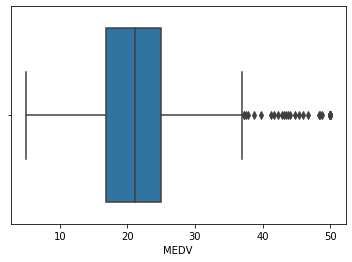

In [162]:
sns.boxplot(df['MEDV'])

In [163]:
Q1, Q3 = df['MEDV'].quantile([0.25, 0.75])
print(Q1, Q3)

16.85 24.95


In [164]:
IQR = Q3 - Q1 ; print(IQR)

8.099999999999998


In [165]:
up_bound = Q3 + 1.5*IQR
low_bound = Q1 - 1.5*IQR

In [166]:
up_bound

37.099999999999994

In [167]:
low_bound

4.700000000000005

In [168]:
len(df[(df['MEDV']> up_bound)|(df['MEDV']<low_bound)]) # outlier 갯수

37

In [169]:
import matplotlib.pyplot as plt

In [170]:
df.apply(lambda x: x.skew(), axis = 0) # 3보다 치우침이 큼

CRIM           5.223149
ZN             2.290540
INDUS          0.335891
CHAS           3.488440
NOX            0.707609
RM             0.430156
AGE           -0.616643
DIS            1.065567
RAD            1.035748
TAX            0.659300
PIRATIO       -0.848553
B             -2.956237
LSTAT          0.893318
MEDV           1.126802
isHighValue    1.152146
dtype: float64

In [171]:
df['CRIM'] = np.log1p(df['CRIM']) # log 변환
df['CRIM'].skew()

1.2692005882725572

In [172]:
# 회귀 모델링

In [174]:
df_1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,MEDV,isHighValue
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,1


In [175]:
df_r = df_1.drop(['isHighValue'], axis = 1); df_r.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [176]:
cols = ['MEDV', 'LSTAT', 'RM', 'CHAS', 'RAD', 'TAX'] # MEDV가 종속변수
print(df_r[cols].corr())

           MEDV     LSTAT        RM      CHAS       RAD       TAX
MEDV   1.000000 -0.735740  0.696047  0.178041 -0.364791 -0.470882
LSTAT -0.735740  1.000000 -0.619292 -0.055692  0.473760  0.548389
RM     0.696047 -0.619292  1.000000  0.095133 -0.199358 -0.301956
CHAS   0.178041 -0.055692  0.095133  1.000000 -0.003152 -0.038370
RAD   -0.364791  0.473760 -0.199358 -0.003152  1.000000  0.884746
TAX   -0.470882  0.548389 -0.301956 -0.038370  0.884746  1.000000


In [177]:
from sklearn.model_selection import train_test_split

In [178]:
help(sklearn.model_selection) # help, dir 함수 잘 써야함

Help on package sklearn.model_selection in sklearn:

NAME
    sklearn.model_selection

PACKAGE CONTENTS
    _search
    _search_successive_halving
    _split
    _validation
    tests (package)

CLASSES
    builtins.object
        sklearn.model_selection._search.ParameterGrid
        sklearn.model_selection._search.ParameterSampler
        sklearn.model_selection._split.BaseCrossValidator
            sklearn.model_selection._split.LeaveOneGroupOut
            sklearn.model_selection._split.LeaveOneOut
            sklearn.model_selection._split.LeavePGroupsOut
            sklearn.model_selection._split.LeavePOut
            sklearn.model_selection._split.PredefinedSplit
        sklearn.model_selection._split.BaseShuffleSplit
            sklearn.model_selection._split.ShuffleSplit
                sklearn.model_selection._split.GroupShuffleSplit
            sklearn.model_selection._split.StratifiedShuffleSplit
    sklearn.model_selection._search.BaseSearchCV(sklearn.base.MetaEstimatorMixi

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
X_cols = ['LSTAT', 'PIRATIO', 'TAX', 'AGE', 'NOX', 'INDUS', 'CRIM']

X = df_r[X_cols].values
y = df_r['MEDV'].values

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y, test_size = 0.3, random_state = 5)

In [181]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_r_scaled = scaler.fit_transform(X_train_r)
X_test_r_scaled = scaler.fit_transform(X_test_r)

In [182]:
X_train_r_scaled

array([[8.16777042e-02, 2.76595745e-01, 4.01529637e-01, ...,
        9.39457203e-02, 8.37104072e-02, 7.05744461e-04],
       [1.67218543e-01, 6.06382979e-01, 4.26386233e-01, ...,
        3.96659708e-02, 1.77224736e-02, 7.43172858e-04],
       [3.20640177e-01, 7.97872340e-01, 1.00000000e+00, ...,
        4.53027140e-01, 1.00000000e+00, 2.81207528e-03],
       ...,
       [6.90949227e-01, 8.08510638e-01, 9.13957935e-01, ...,
        6.28392484e-01, 6.36500754e-01, 2.81441090e-01],
       [3.76379691e-01, 5.53191489e-01, 4.66539197e-01, ...,
        3.23590814e-01, 3.31447964e-01, 1.39665244e-03],
       [2.54966887e-01, 6.38297872e-01, 1.70172084e-01, ...,
        2.02505219e-01, 3.53318250e-01, 2.51062494e-03]])

In [183]:
# 선형회귀
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train_r_scaled, y_train_r)

LinearRegression()

In [184]:
print(model_lr.coef_)

[-29.99730958 -11.11749191   2.80500923   5.24434878  -2.60727993
  -3.52531903  -5.65400119]


In [185]:
print(model_lr.intercept_)

36.27981078120695


In [186]:
# SVM
from sklearn.svm import SVR

model_svr = SVR()
model_svr.fit(X_train_r_scaled, y_train_r)

SVR()

In [188]:
# RandomForest
from sklearn.ensemble import RandomForestRegressor

model_rfr = RandomForestRegressor(random_state = 5)
model_rfr.fit(X_train_r_scaled, y_train_r)

RandomForestRegressor(random_state=5)

In [189]:
y_pred_lr = model_lr.predict(X_test_r_scaled)
y_pred_svr = model_svr.predict(X_test_r_scaled)
y_pred_rfr = model_rfr.predict(X_test_r_scaled)

In [194]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
# LR 결과
print("선형 회귀 결과")
print('MAE : %.3f' %mean_absolute_error(y_test_r, y_pred_lr))
print('MAE : %.3f' %mean_squared_error(y_test_r, y_pred_lr))
print('MAE : %.3f' %mean_absolute_percentage_error(y_test_r, y_pred_lr))
print('-'*30)
print("SVR 결과")
print('MAE : %.3f' %mean_absolute_error(y_test_r, y_pred_svr))
print('MAE : %.3f' %mean_squared_error(y_test_r, y_pred_svr))
print('MAE : %.3f' %mean_absolute_percentage_error(y_test_r, y_pred_svr))
print('-'*30)
print("RFR 결과")
print('MAE : %.3f' %mean_absolute_error(y_test_r, y_pred_rfr))
print('MAE : %.3f' %mean_squared_error(y_test_r, y_pred_rfr))
print('MAE : %.3f' %mean_absolute_percentage_error(y_test_r, y_pred_rfr))
print('-'*30)

선형 회귀 결과
MAE : 4.085
MAE : 33.673
MAE : 0.189
------------------------------
SVR 결과
MAE : 3.896
MAE : 37.590
MAE : 0.159
------------------------------
RFR 결과
MAE : 2.936
MAE : 15.905
MAE : 0.137
------------------------------


In [195]:
# 분류

In [196]:
df_c = df_1.drop(['MEDV'],axis = 1)

In [197]:
df_c

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,isHighValue
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,0.25651,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,0
522,0.25651,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,0
523,0.25651,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,0
524,0.25651,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,0


In [200]:
import numpy as np

In [202]:
df_c.groupby('isHighValue').apply(np.mean).T

isHighValue,0,1
CRIM,4.366785,0.856514
ZN,6.351523,24.602273
INDUS,12.920812,6.488485
CHAS,0.048223,0.121212
NOX,0.576558,0.494454
RM,6.023721,7.009394
AGE,73.359137,55.257576
DIS,3.534238,4.365642
RAD,10.492386,6.204545
TAX,442.220812,316.007576


In [213]:
X_cols = ['LSTAT', 'PIRATIO', 'TAX', 'AGE', 'NOX', 'INDUS', 'CRIM']

X = df_1[X_cols].values
y = df_1['isHighValue'].values

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [214]:
scaler = MinMaxScaler()

X_train_c_scaled = scaler.fit_transform(X_train_c)
X_test_c_scaled = scaler.fit_transform(X_test_c)

In [215]:
y_train_c

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [216]:
from sklearn.linear_model import LogisticRegression

model_lo = LogisticRegression()
model_lo.fit(X_train_c_scaled, y_train_c)

LogisticRegression()

In [236]:
dir(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

In [237]:
from sklearn.svm import SVC

model_svc = SVC(probability = True)
model_svc.fit(X_train_c_scaled, y_train_c)

SVC(probability=True)

In [238]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier()
model_rfc.fit(X_train_c_scaled, y_train_c)

RandomForestClassifier()

In [239]:
y_pred_lo = model_lo.predict(X_test_c_scaled)
y_pred_svc = model_svc.predict(X_test_c_scaled)
y_pred_rfc = model_rfc.predict(X_test_c_scaled)

In [240]:
from sklearn.metrics import classification_report

In [241]:

print(classification_report(y_test_c, y_pred_lo, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91       115
           1       0.92      0.51      0.66        43

    accuracy                           0.85       158
   macro avg       0.88      0.75      0.78       158
weighted avg       0.86      0.85      0.84       158



In [242]:
print('로지스틱회귀')
print(classification_report(y_test_c, y_pred_lo, labels = [0,1]))

print('SVC')
print(classification_report(y_test_c, y_pred_svc, labels = [0,1]))

print('랜포')
print(classification_report(y_test_c, y_pred_rfc, labels = [0,1]))

로지스틱회귀
              precision    recall  f1-score   support

           0       0.84      0.98      0.91       115
           1       0.92      0.51      0.66        43

    accuracy                           0.85       158
   macro avg       0.88      0.75      0.78       158
weighted avg       0.86      0.85      0.84       158

SVC
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       115
           1       0.81      0.67      0.73        43

    accuracy                           0.87       158
   macro avg       0.85      0.81      0.82       158
weighted avg       0.86      0.87      0.86       158

랜포
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       115
           1       0.91      0.72      0.81        43

    accuracy                           0.91       158
   macro avg       0.91      0.85      0.87       158
weighted avg       0.91      0.91      0.90       158



In [243]:
from sklearn.metrics import roc_auc_score

y_pred_lo = model_lo.predict_proba(X_test_c_scaled)[:,1]
y_pred_svc = model_svc.predict_proba(X_test_c_scaled)[:,1]
y_pred_rfc = model_rfc.predict_proba(X_test_c_scaled)[:,1]

In [245]:
print('로지스틱 ROC_AUC : %.3f' %roc_auc_score(y_test_c, y_pred_lo))
print('SVC ROC_AUC : %.3f' %roc_auc_score(y_test_c, y_pred_svc))
print('RFC ROC_AUC : %.3f' %roc_auc_score(y_test_c, y_pred_rfc))

로지스틱 ROC_AUC : 0.909
SVC ROC_AUC : 0.921
RFC ROC_AUC : 0.930
